In [1]:
import pandas as pd

naslib_path = '../../zero_cost/NASLib'
benchmark = 'zc_nasbench301'

In [2]:
from zc_combine.utils.naslib_utils import load_search_space, parse_scores


search_space = load_search_space(naslib_path, benchmark)
dfs = parse_scores(search_space)

In [3]:
dataset = 'cifar10'
proxy = 'nwot'
data = dfs[dataset]

In [5]:
data.sort_values('val_accs')

,net,val_accs,epe_nas,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,synflow,zen,random,rank
9447,"(((0, 6), (1, 1), (0, 1), (2, 0), (1, 2), (3, ...",87.500000,1634.556705,0.339207,102.184448,37.459999,-9.234554,-64.944962,171.912689,855.259762,0.471914,0.283955,107.413254,32.712783,53.752247,5176,11221.0
9297,"(((0, 5), (1, 6), (1, 1), (2, 2), (2, 4), (3, ...",88.860001,1687.118636,0.381204,138.425856,63.024170,-5.633011,-65.017552,449.839386,881.628686,0.745898,0.186180,191.119614,72.963911,116.771339,11081,11220.0
1402,"(((0, 6), (1, 5), (1, 5), (2, 2), (2, 0), (3, ...",88.889999,1963.964732,0.273354,145.397248,56.114601,-2.453232,-64.923154,526.936462,885.241806,0.785002,0.032991,161.974960,68.790047,131.131287,2278,11219.0
5341,"(((0, 1), (1, 2), (0, 1), (2, 6), (2, 0), (3, ...",89.190002,1543.617938,0.299697,109.680128,44.775513,-10.497036,-67.364318,238.979614,858.628524,0.541610,0.227653,119.876968,45.083468,69.156059,4805,11218.0
4048,"(((0, 1), (1, 1), (1, 5), (2, 1), (1, 1), (3, ...",89.239998,1853.460139,0.313330,138.098176,50.763680,-6.500504,-65.166187,450.990936,877.672609,0.733610,0.286436,162.712280,80.705596,112.680389,8914,11217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,"(((0, 4), (1, 4), (0, 4), (1, 2), (0, 2), (1, ...",94.410004,1761.254216,0.099845,204.510720,43.360500,-0.092552,-64.916549,897.238342,906.416163,1.172842,0.002038,122.211288,56.965609,218.934540,2606,5.0
389,"(((0, 4), (1, 2), (0, 3), (2, 3), (0, 3), (1, ...",94.570000,1909.887239,0.150151,205.149696,49.615250,-0.651365,-64.919519,960.015198,913.615498,1.199018,0.029432,140.875961,63.400047,215.874924,8261,4.0
5633,"(((0, 6), (1, 2), (0, 3), (1, 5), (2, 5), (3, ...",94.580002,1803.571787,0.113888,194.131456,48.550419,-0.697636,-64.962716,948.588806,907.216012,1.163690,0.069536,136.320786,62.621101,211.013840,3049,2.5
839,"(((0, 2), (1, 3), (0, 4), (1, 3), (1, 2), (3, ...",94.580002,1640.792774,0.299776,189.453824,73.819962,-0.055420,-64.945430,879.151306,906.899617,1.129386,0.071323,224.824478,79.989709,200.044708,6294,2.5


In [4]:
import os

bench_dir = os.path.join(naslib_path, f'naslib/data/zc_benchmarks/{proxy}')
os.listdir(bench_dir)

['benchmark--normalize--no_relu--nasbench201--cifar10--0.json',
 'benchmark--normalize--relu--nasbench201--cifar10--0.json',
 'benchmark--no_norm--relu--nasbench201--cifar10--0.json',
 'benchmark--normalize--no_relu--nasbench301--cifar10--0.json',
 'benchmark--nasbench201--cifar10--28.json',
 'benchmark--no_norm--relu--transbench101_micro--class_scene--0.json',
 'benchmark--no_norm--relu--nasbench301--cifar10--0.json',
 'benchmark--nasbench201--cifar10--1377.json',
 'benchmark--nasbench201--cifar10--14.json',
 'benchmark--nasbench201--cifar10--0.json',
 'benchmark--normalize--relu--transbench101_micro--class_scene--0.json']

In [5]:
import pandas as pd

counts = []

for i in range(3, 7):
    val = data[data['val_accs'] > 94.3]['net'].str.count(f', {i}')
    val.name = str(i)
    counts.append(val)

pd.concat(counts, axis=1)

,3,4,5,6
389,4,4,1,0
436,6,2,3,1
454,4,5,2,1
492,2,4,4,0
583,3,3,5,1
601,5,5,1,2
839,5,4,1,2
2753,1,6,2,3
3064,3,4,1,2
3250,5,6,1,0


In [5]:
import json
import os

new_score_file = 'benchmark--no_norm--relu--nasbench301--cifar10--0.json'

with open(os.path.join(bench_dir, new_score_file), 'r') as f:
    new_data = json.load(f)

In [6]:
data[f'new_{proxy}'] = 0#data[proxy]

for net_data in new_data:
    mask = data['net'] == net_data['arch']
    data_row = data[mask]
    assert len(data_row) == 1
    data.loc[mask, f'new_{proxy}'] = net_data[proxy]['score']

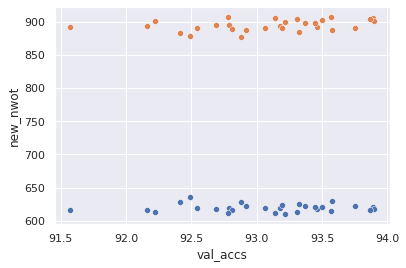

In [9]:
pld = data[data[f'new_{proxy}'] > 0][['net', 'val_accs', f'new_{proxy}', proxy]]

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

sns.scatterplot(data=pld, x='val_accs', y='new_nwot')
sns.scatterplot(data=pld, x='val_accs', y='nwot')
plt.show()

In [11]:
ylims = {'nwot': (550, 850)}

def plt_ylim(prox):
    if prox not in ylims:
        return
    plt.ylim(ylims[prox][0], ylims[prox][1])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.scatterplot(data=data, x='val_accs', y=proxy)
#plt.xlim(70, 91)
#plt_ylim(proxy)
plt.show()

9447    87.500000
9297    88.860001
1402    88.889999
5341    89.190002
4048    89.239998
          ...    
7190    94.410004
389     94.570000
5633    94.580002
839     94.580002
3250    94.690002
Name: val_accs, Length: 11221, dtype: float64

In [9]:
from zc_combine.fixes.operations import parse_ops_nb301, count_all_ops, get_nb301_cell

count_set = {2, 3, 4, 5, 6}
ops = parse_ops_nb301(data)
ops = get_nb301_cell(ops, both=True)
count_all_ops(data, ops, count_set)

11221

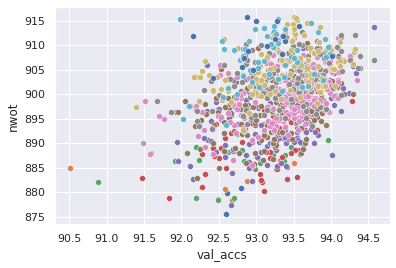

In [14]:
from zc_combine.fixes.operations import filter_by_ops, plot_clouds

filt_data = data.iloc[filter_by_ops(ops, {1, 2, 3, 4, 5, 6})]

plot_clouds(filt_data, (3,4,5,6), proxy, vmin=0, vmax=16)
#plt_ylim(proxy)
plt.show()

In [15]:
# NB201 op names and edge indices to edges for convenience
OPS = ["max_pool_3x3", "avg_pool_3x3", "skip_connect", "sep_conv_3x3", "sep_conv_5x5", "dil_conv_3x3", "dil_conv_5x5"]

# TODO edges?

## NASWOT bias
NASWOT seems to be highly biased towards the number of convolutions. Let us define `count` == number of `Conv3x3` + number of `Conv5x5` (both dil and sep) in a cell.

Then, plotting every count (from 1 to 6) as a different colour, we get this:

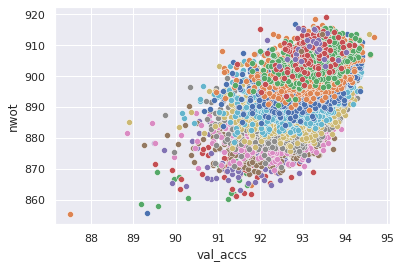

In [16]:
from zc_combine.fixes.operations import plot_clouds

plot_clouds(data, (3,4,5,6), proxy, vmin=0, vmax=17)
#plt_ylim(proxy)
plt.show()

Let us zoom on a cloud, let's say `count` == 4 (red if plotting from `count` == 1).

Then, the clouds don't seem to depend on the number of `Conv3x3`.

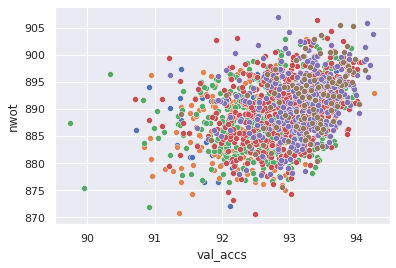

In [29]:
zoom = 8

data_zoom = data[(data[str((3,4,5,6))] == zoom)]
plot_clouds(data_zoom, data_zoom[str((2,))], proxy, vmax=6)
#plt.xlim(69, 93)
#plt.ylim(700, 820)
plt.show()

If we examine the clusters, the lower scored networks have more pooling ops and dil convs, while upper scored networks have more skip connections and sep convs.

In [28]:
import numpy as np
from zc_combine.fixes.operations import filter_by_range

def get_op_array(df):
    ops = parse_ops_nb301(df)
    ops = get_nb301_cell(ops, both=True)
    return np.array(ops)

ops_1 = get_op_array(filter_by_range(data_zoom, proxy, 0, 880))
ops_2 = get_op_array(filter_by_range(data_zoom, proxy, 880, 890))
ops_3 = get_op_array(filter_by_range(data_zoom, proxy, 890, 900))

NameError: name 'data_zoom' is not defined

In [55]:
np.unique(ops_1.flatten(), return_counts=True)[1] / (ops_1.shape[0] * ops_1.shape[1])

array([0.18247126, 0.18821839, 0.12931034, 0.08405172, 0.0704023 ,
       0.17816092, 0.16738506])

In [56]:
np.unique(ops_2.flatten(), return_counts=True)[1] / (ops_2.shape[0] * ops_2.shape[1])

array([0.17598123, 0.16972412, 0.15429465, 0.10658419, 0.11127702,
       0.14071388, 0.14142491])

In [57]:
np.unique(ops_3.flatten(), return_counts=True)[1] / (ops_3.shape[0] * ops_3.shape[1])

array([0.15817901, 0.16373457, 0.17808642, 0.13842593, 0.14436728,
       0.10756173, 0.10964506])

## Conclusion
NASWOT score on NB301 (DARTS searchspace?) is still heavily biased towards the number of convolutions. However, the score is less regular than on the simpler NB

In [63]:
data

,net,val_accs,epe_nas,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,...,"(2, 3, 5)","(2, 3, 6)","(2, 4, 5)","(2, 4, 6)","(2, 5, 6)","(2, 3, 4, 5)","(2, 3, 4, 6)","(2, 3, 5, 6)","(2, 4, 5, 6)","(2, 3, 4, 5, 6)"
0,"(((0, 6), (1, 4), (0, 0), (1, 5), (1, 4), (3, ...",93.459999,1763.570304,0.278703,169.285120,54.205917,-1.016964,-64.947013,674.346436,892.207239,...,4,5,9,10,7,9,10,7,12,12
1,"(((0, 4), (1, 5), (0, 6), (2, 2), (1, 0), (3, ...",92.790001,1719.284287,0.408550,166.336000,79.345772,-6.383812,-64.978063,696.573425,895.794615,...,7,7,7,7,6,10,10,9,9,12
2,"(((0, 4), (1, 6), (0, 2), (1, 0), (0, 0), (1, ...",93.320000,2107.323702,0.204066,145.413632,49.157295,-4.990181,-64.921424,514.982910,885.212872,...,5,8,3,6,5,6,9,8,6,9
3,"(((0, 3), (1, 3), (0, 5), (2, 0), (2, 1), (3, ...",92.809998,1793.044846,0.259312,157.939200,65.735664,-1.175217,-64.880813,619.798401,888.425023,...,6,5,4,3,4,7,6,7,5,8
4,"(((0, 6), (1, 4), (0, 3), (2, 2), (0, 0), (3, ...",92.919998,1832.459174,0.227962,152.385024,50.767960,-0.533310,-64.909777,565.735718,888.114857,...,6,5,8,7,6,9,8,7,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,"(((0, 6), (1, 5), (0, 5), (2, 5), (1, 0), (3, ...",92.919998,1679.052704,0.209306,167.384576,52.821743,-2.142632,-65.067712,718.766357,897.881583,...,8,7,8,7,10,10,9,12,12,14
11217,"(((0, 6), (1, 4), (0, 4), (2, 3), (2, 4), (3, ...",92.750000,1766.546085,0.585298,209.344000,111.664543,-3.051392,-65.005401,933.984375,907.282405,...,6,8,8,10,8,10,12,10,12,14
11218,"(((0, 5), (1, 0), (0, 4), (2, 6), (2, 4), (3, ...",92.080002,1965.672082,0.265882,155.719168,58.341690,-7.725037,-65.024960,563.792419,886.417815,...,5,3,7,5,7,7,5,7,9,9
11219,"(((0, 6), (1, 5), (0, 0), (1, 6), (0, 2), (2, ...",92.550003,1691.945664,0.152586,150.967808,38.095749,-3.256350,-64.959636,537.478882,891.299586,...,7,8,8,9,11,8,9,11,12,12
